### Project 2 Submission - Student Details


* Student name: Yessy Rayner
* Student pace: Part-time
* Scheduled project review date/time: Saturday 20 August 2022
* Instructor name: JP Hwang

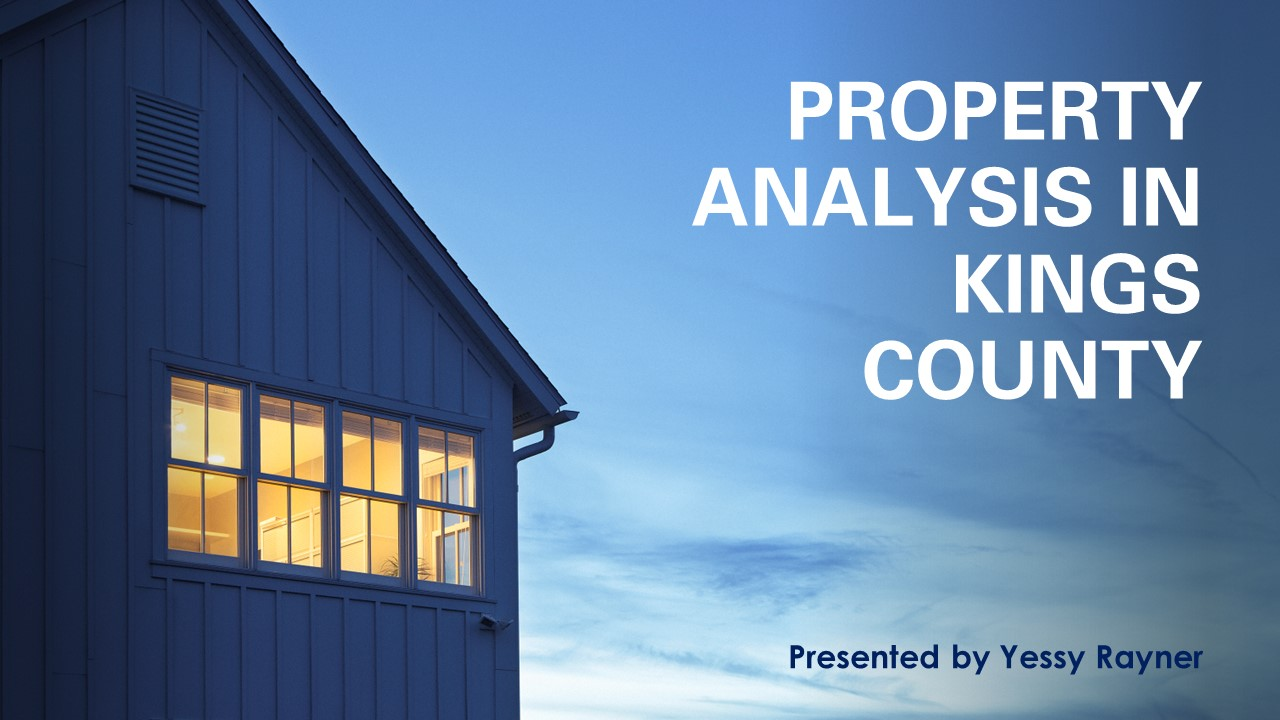

# Business Analysis on Property Investment in Kings County, CA


## Business Overview

KC Financial Investment would like to expand their business portfolio to include property buy and sell investment. They would like to invest in the property buy and sell market in the Kings County, California. According to Realtor.com homes for sale in Kings County spend an average of 50 days on the market, so it is quite a lucrative market in term of the short sales turn around. Also the outgoing fees for buying and selling in Kings County are relatively low (under 1%) as long as they don't engage the real estate agent services due to high commission.

Their goal is to maximise profits through the buy and sell, and would like the Business Analyst (myself) to build a model that predict the house prices based on the sales database in the past two years.

Once the prediction model is built, they will then analyse all of the available houses that are currently for sale in the market and  purchase the properties that are under predicted asking price. They will resell after a few weeks.

## Data Cleaning and Preparation

In this section, I will be reviewing, checking and cleaning the datas, in order to:

- Ensure the datas are in correct data types
- Evaluate if there are any missing value and fill it with approriate value

Once datas are cleaned, I will separate them into 3 variables or features as follow for testing and validation in order to get the best model:

- Continuous variables (A continuous variable can be of any value in a range, for example: sqft living and lot sizes)
- Discrete variables (certain number of particular values that can be counted, for example: number of bedrooms)
- Categorical variables (descriptive categories instead of numerical or measured categories, for example: zipcodes)

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

> This cell below gave an error, so I have converted it to markdown.
> It's good practice to just restart the kernel & run all cells when finished, as errors like this would be easy to pick out.

# %load data/column_names.md
# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [2]:
#Now let's import the sales database for the past 2 years

kc_data = pd.read_csv('data/kc_house_data.csv')

In [3]:
kc_data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
# A quick look on the data types and check if there are any missing value
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

> `kc_data['sqft_basement'].astype(float)` would work too

In [5]:
#Convert sqft_basement from object to float first as there are numbers value attached to them
kc_data['sqft_basement'] = pd.to_numeric(kc_data['sqft_basement'], errors='coerce')

> `kc_data['sqft_basement'].isna().sum()` works as well.
>
> Looking at `.value_counts` might hide non-numerical values if they're in the middle of the possible values

In [6]:
kc_data['sqft_basement'].value_counts(dropna=False)
#454 NaN value, I will convert them to 0 at later stage due to majority value of 0 (0 indicates no basement) 

0.0       12826
NaN         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

> There's no real need to convert floats to integers. Since integers can't handle decimals, and numerical methods like regression requires decimals, they will need to be converted back to floating point numbers anyway. 

In [7]:
#Convert all float to int for consistency with the rest of the data types
m = kc_data.select_dtypes(np.number)
kc_data[m.columns]= m.round().astype('Int64')

In [8]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21597 non-null  Int64 
 1   date           21597 non-null  object
 2   price          21597 non-null  Int64 
 3   bedrooms       21597 non-null  Int64 
 4   bathrooms      21597 non-null  Int64 
 5   sqft_living    21597 non-null  Int64 
 6   sqft_lot       21597 non-null  Int64 
 7   floors         21597 non-null  Int64 
 8   waterfront     19221 non-null  Int64 
 9   view           21534 non-null  Int64 
 10  condition      21597 non-null  Int64 
 11  grade          21597 non-null  Int64 
 12  sqft_above     21597 non-null  Int64 
 13  sqft_basement  21143 non-null  Int64 
 14  yr_built       21597 non-null  Int64 
 15  yr_renovated   17755 non-null  Int64 
 16  zipcode        21597 non-null  Int64 
 17  lat            21597 non-null  Int64 
 18  long           21597 non-n

In [9]:
#Looking at the above data yr_renovated, view, sqft_basement and waterfront have some missing value, so let's investigate 
kc_data['yr_renovated'].value_counts(dropna=False)

0       17011
<NA>     3842
2014       73
2013       31
2003       31
        ...  
1953        1
1946        1
1976        1
1948        1
1950        1
Name: yr_renovated, Length: 71, dtype: Int64

In [10]:
kc_data['waterfront'].value_counts(dropna=False)

0       19075
<NA>     2376
1         146
Name: waterfront, dtype: Int64

In [11]:
kc_data['view'].value_counts(dropna=False)

0       19422
2         957
3         508
1         330
4         317
<NA>       63
Name: view, dtype: Int64

In [12]:
kc_data['sqft_basement'].value_counts(dropna=False)

0       12826
<NA>      454
600       217
500       209
700       208
        ...  
2310        1
2120        1
295         1
207         1
1281        1
Name: sqft_basement, Length: 304, dtype: Int64

In [13]:
#Due to majority of the counts are 0, I will replace the NaN value to 0. And these 0s indicate:
#NOT waterfront property, NO basement, NOT being viewed, NOT renovated
kc_data['waterfront'].fillna(0, inplace=True)
kc_data['sqft_basement'].fillna(0, inplace=True)
kc_data['view'].fillna(0, inplace=True)
kc_data['yr_renovated'].fillna(0, inplace=True)

In [14]:
# Double check the cleaned dataframe, majority of them have value now  and in correct type
# I didn't clean the 'date' column, as I won't be using them as feature
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21597 non-null  Int64 
 1   date           21597 non-null  object
 2   price          21597 non-null  Int64 
 3   bedrooms       21597 non-null  Int64 
 4   bathrooms      21597 non-null  Int64 
 5   sqft_living    21597 non-null  Int64 
 6   sqft_lot       21597 non-null  Int64 
 7   floors         21597 non-null  Int64 
 8   waterfront     21597 non-null  Int64 
 9   view           21597 non-null  Int64 
 10  condition      21597 non-null  Int64 
 11  grade          21597 non-null  Int64 
 12  sqft_above     21597 non-null  Int64 
 13  sqft_basement  21597 non-null  Int64 
 14  yr_built       21597 non-null  Int64 
 15  yr_renovated   21597 non-null  Int64 
 16  zipcode        21597 non-null  Int64 
 17  lat            21597 non-null  Int64 
 18  long           21597 non-n

In [15]:
#Lets check the sales datas that we have
kc_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.059777   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.754435    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.000000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      2.000000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.000000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.000000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.534750      0.006760      0.233181      3.409825   
std    4.141264e+04      0.554376      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      2.000000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      4.000000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.694356   -122.000046    1986.620318   12758.283512  
std       53.513072      0.460690      0.040258     685.230472   27274.441950  
min    98001.000000     47.000000   -123.000000     399.000000     651.000000  
25%    98033.000000     47.000000   -122.000000    1490.000000    5100.000000  
50%    98065.000000     48.000000   -122.000000    1840.000000    7620.000000  
75%    98118.000000     48.000000   -122.000000    2360.000000   10083.000000  
max    98199.000000     48.000000   -121.000000    6210.000000  871200.000000

In [16]:
kc_data.describe(include=np.number)

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.059777   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.754435    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.000000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      2.000000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.000000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.000000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.534750      0.006760      0.233181      3.409825   
std    4.141264e+04      0.554376      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      2.000000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      4.000000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.694356   -122.000046    1986.620318   12758.283512  
std       53.513072      0.460690      0.040258     685.230472   27274.441950  
min    98001.000000     47.000000   -123.000000     399.000000     651.000000  
25%    98033.000000     47.000000   -122.000000    1490.000000    5100.000000  
50%    98065.000000     48.000000   -122.000000    1840.000000    7620.000000  
75%    98118.000000     48.000000   -122.000000    2360.000000   10083.000000  
max    98199.000000     48.000000   -121.000000    6210.000000  871200.000000

In [17]:
num_vars = kc_data.describe(include=np.number).columns.tolist()
num_vars = [c for c in num_vars if c != 'price' ]
print(num_vars)

['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## Modelling

Upon reviewing the above datas and their value, here are my breakdown on the features or variables. So we can model it approriately on the next step using linear regression model to predict property prices based on below features:

- Categorical: Waterfront, zipcode
- Discrete: condition, grade, bedrooms, bathrooms, floors, view
- Continuous: yr_build, yr_renovated, lat, long, ALL of sqft_

> Although it doesn't matter, I think yr_build and yr_renovated are discrete too (you can't have Year 2020.5). 
> 
> But as you know, what matters is splitting categorical variables from continuous so it's all fine.

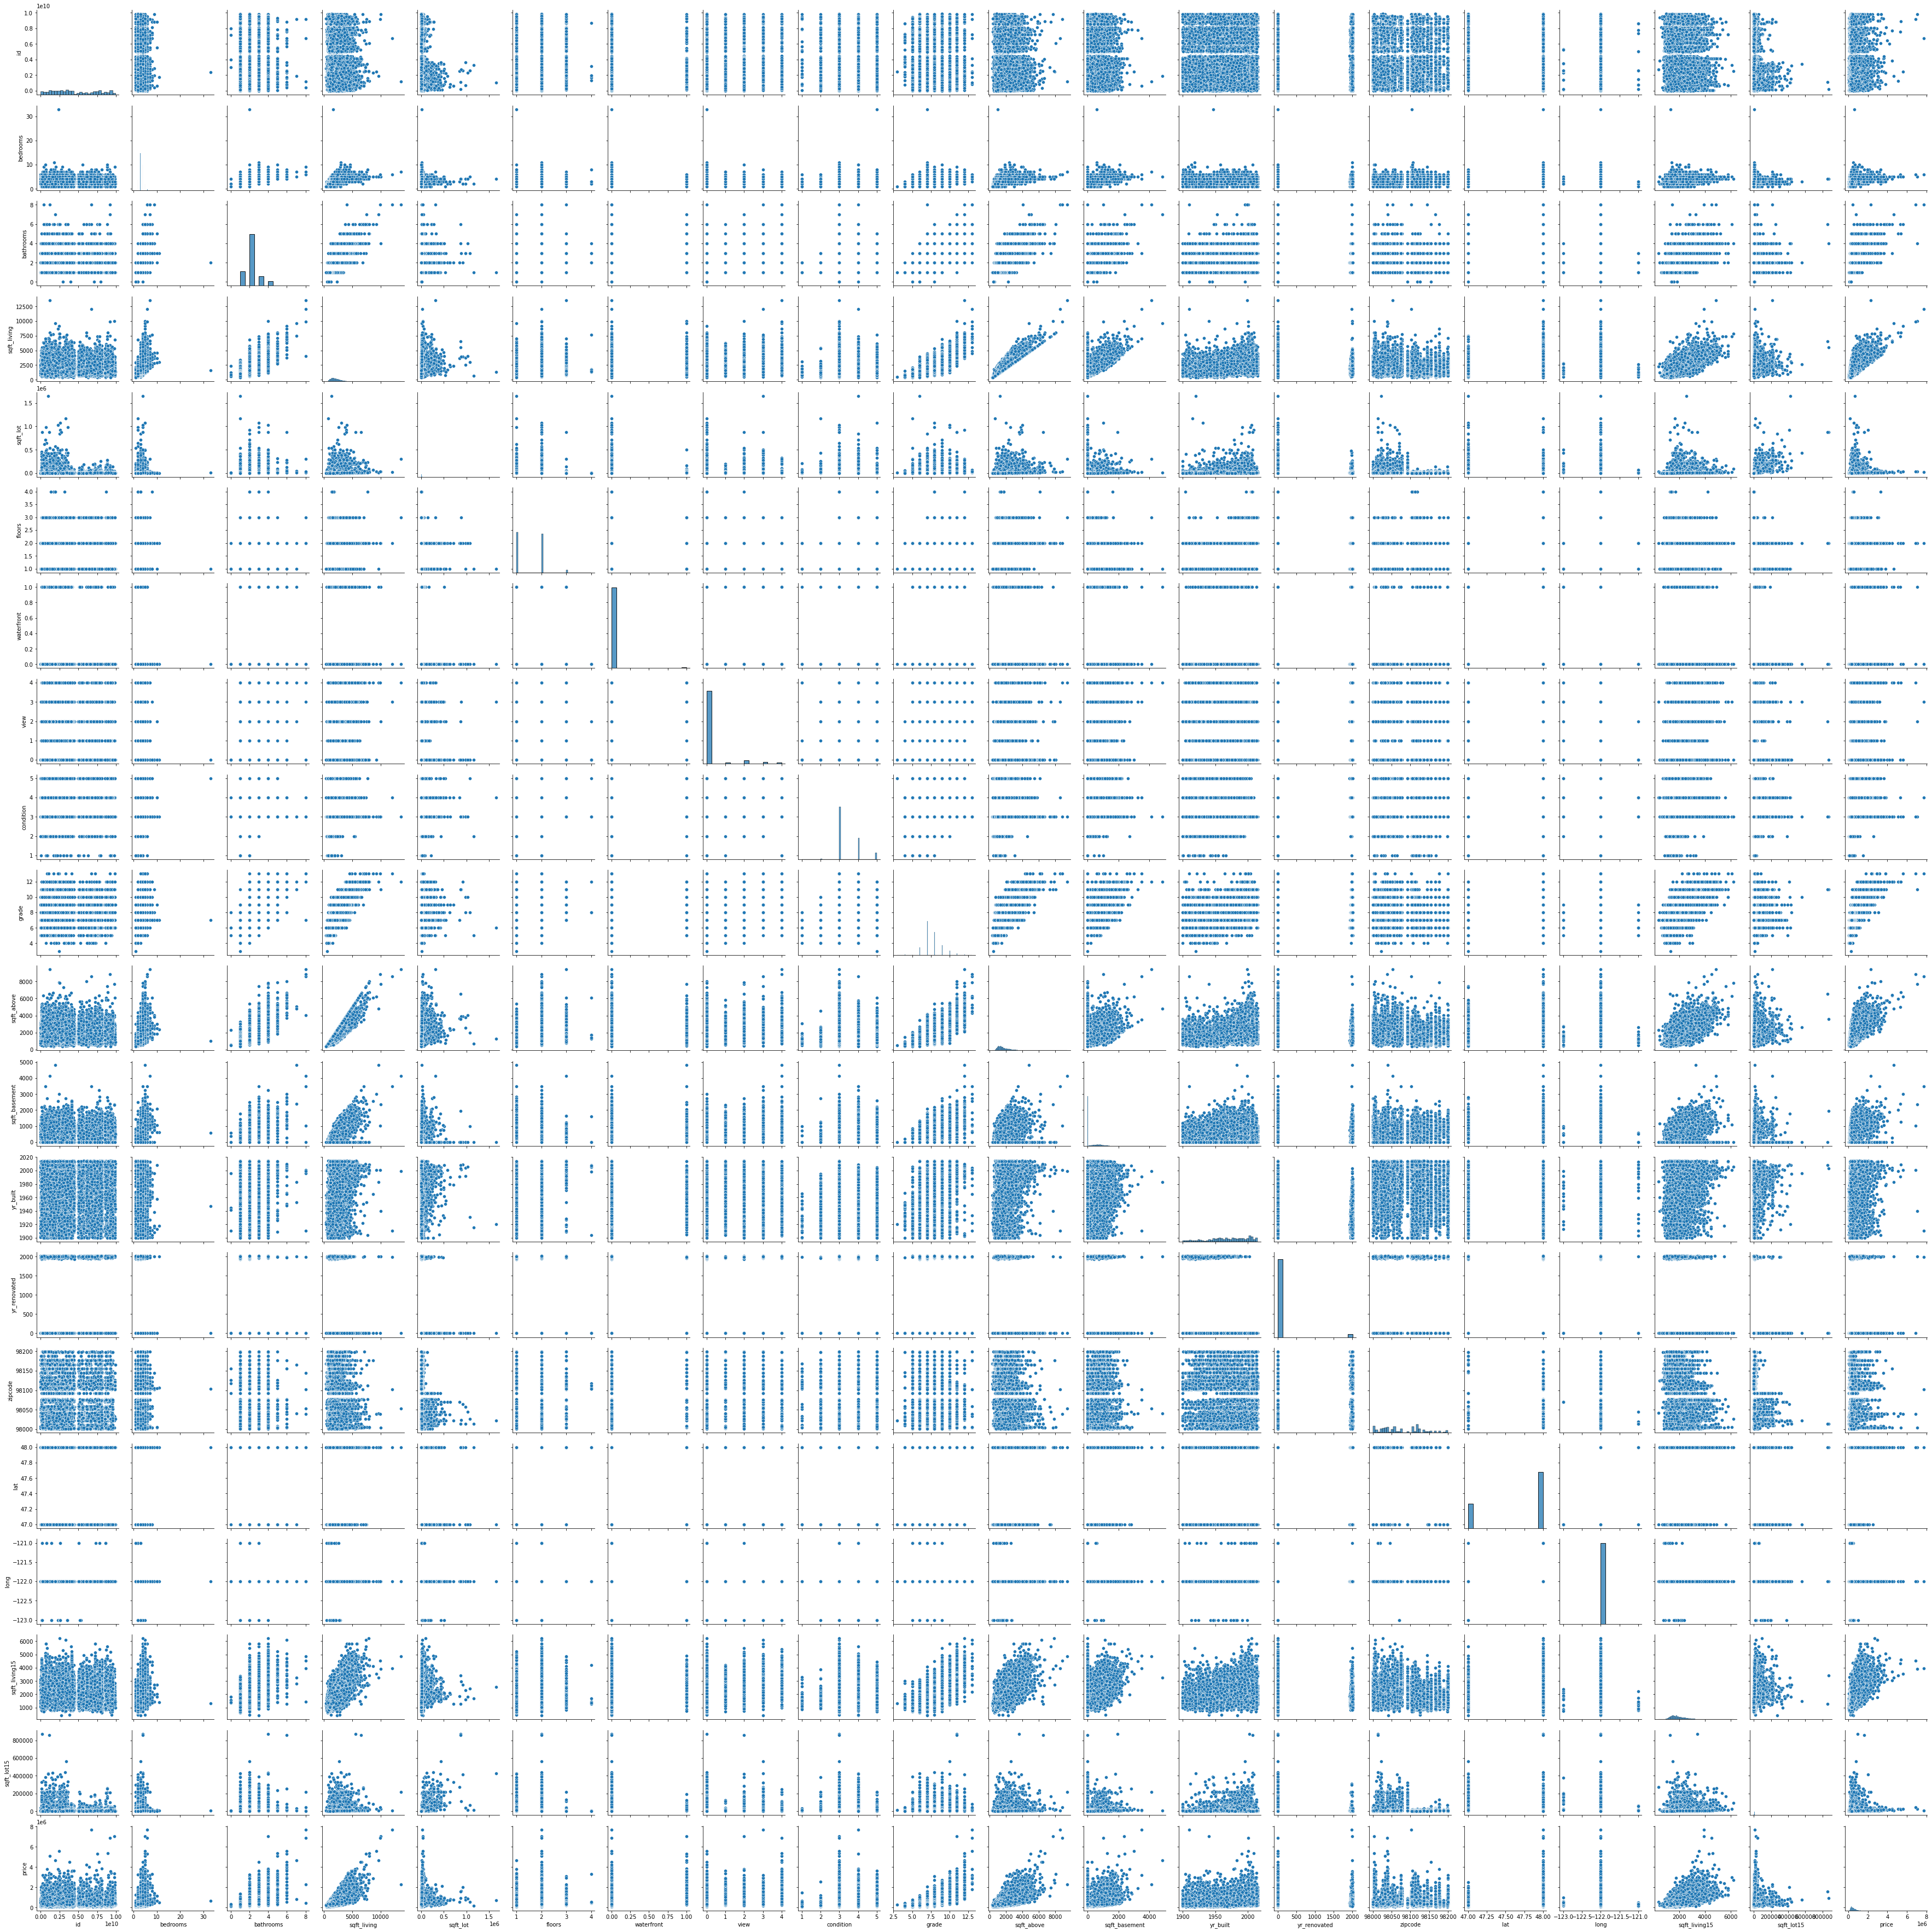

In [18]:
#Let's have a quick look to see if there are any relationship or inconsistency in the datas through pairplot

sns.pairplot(kc_data[num_vars + ['price']])

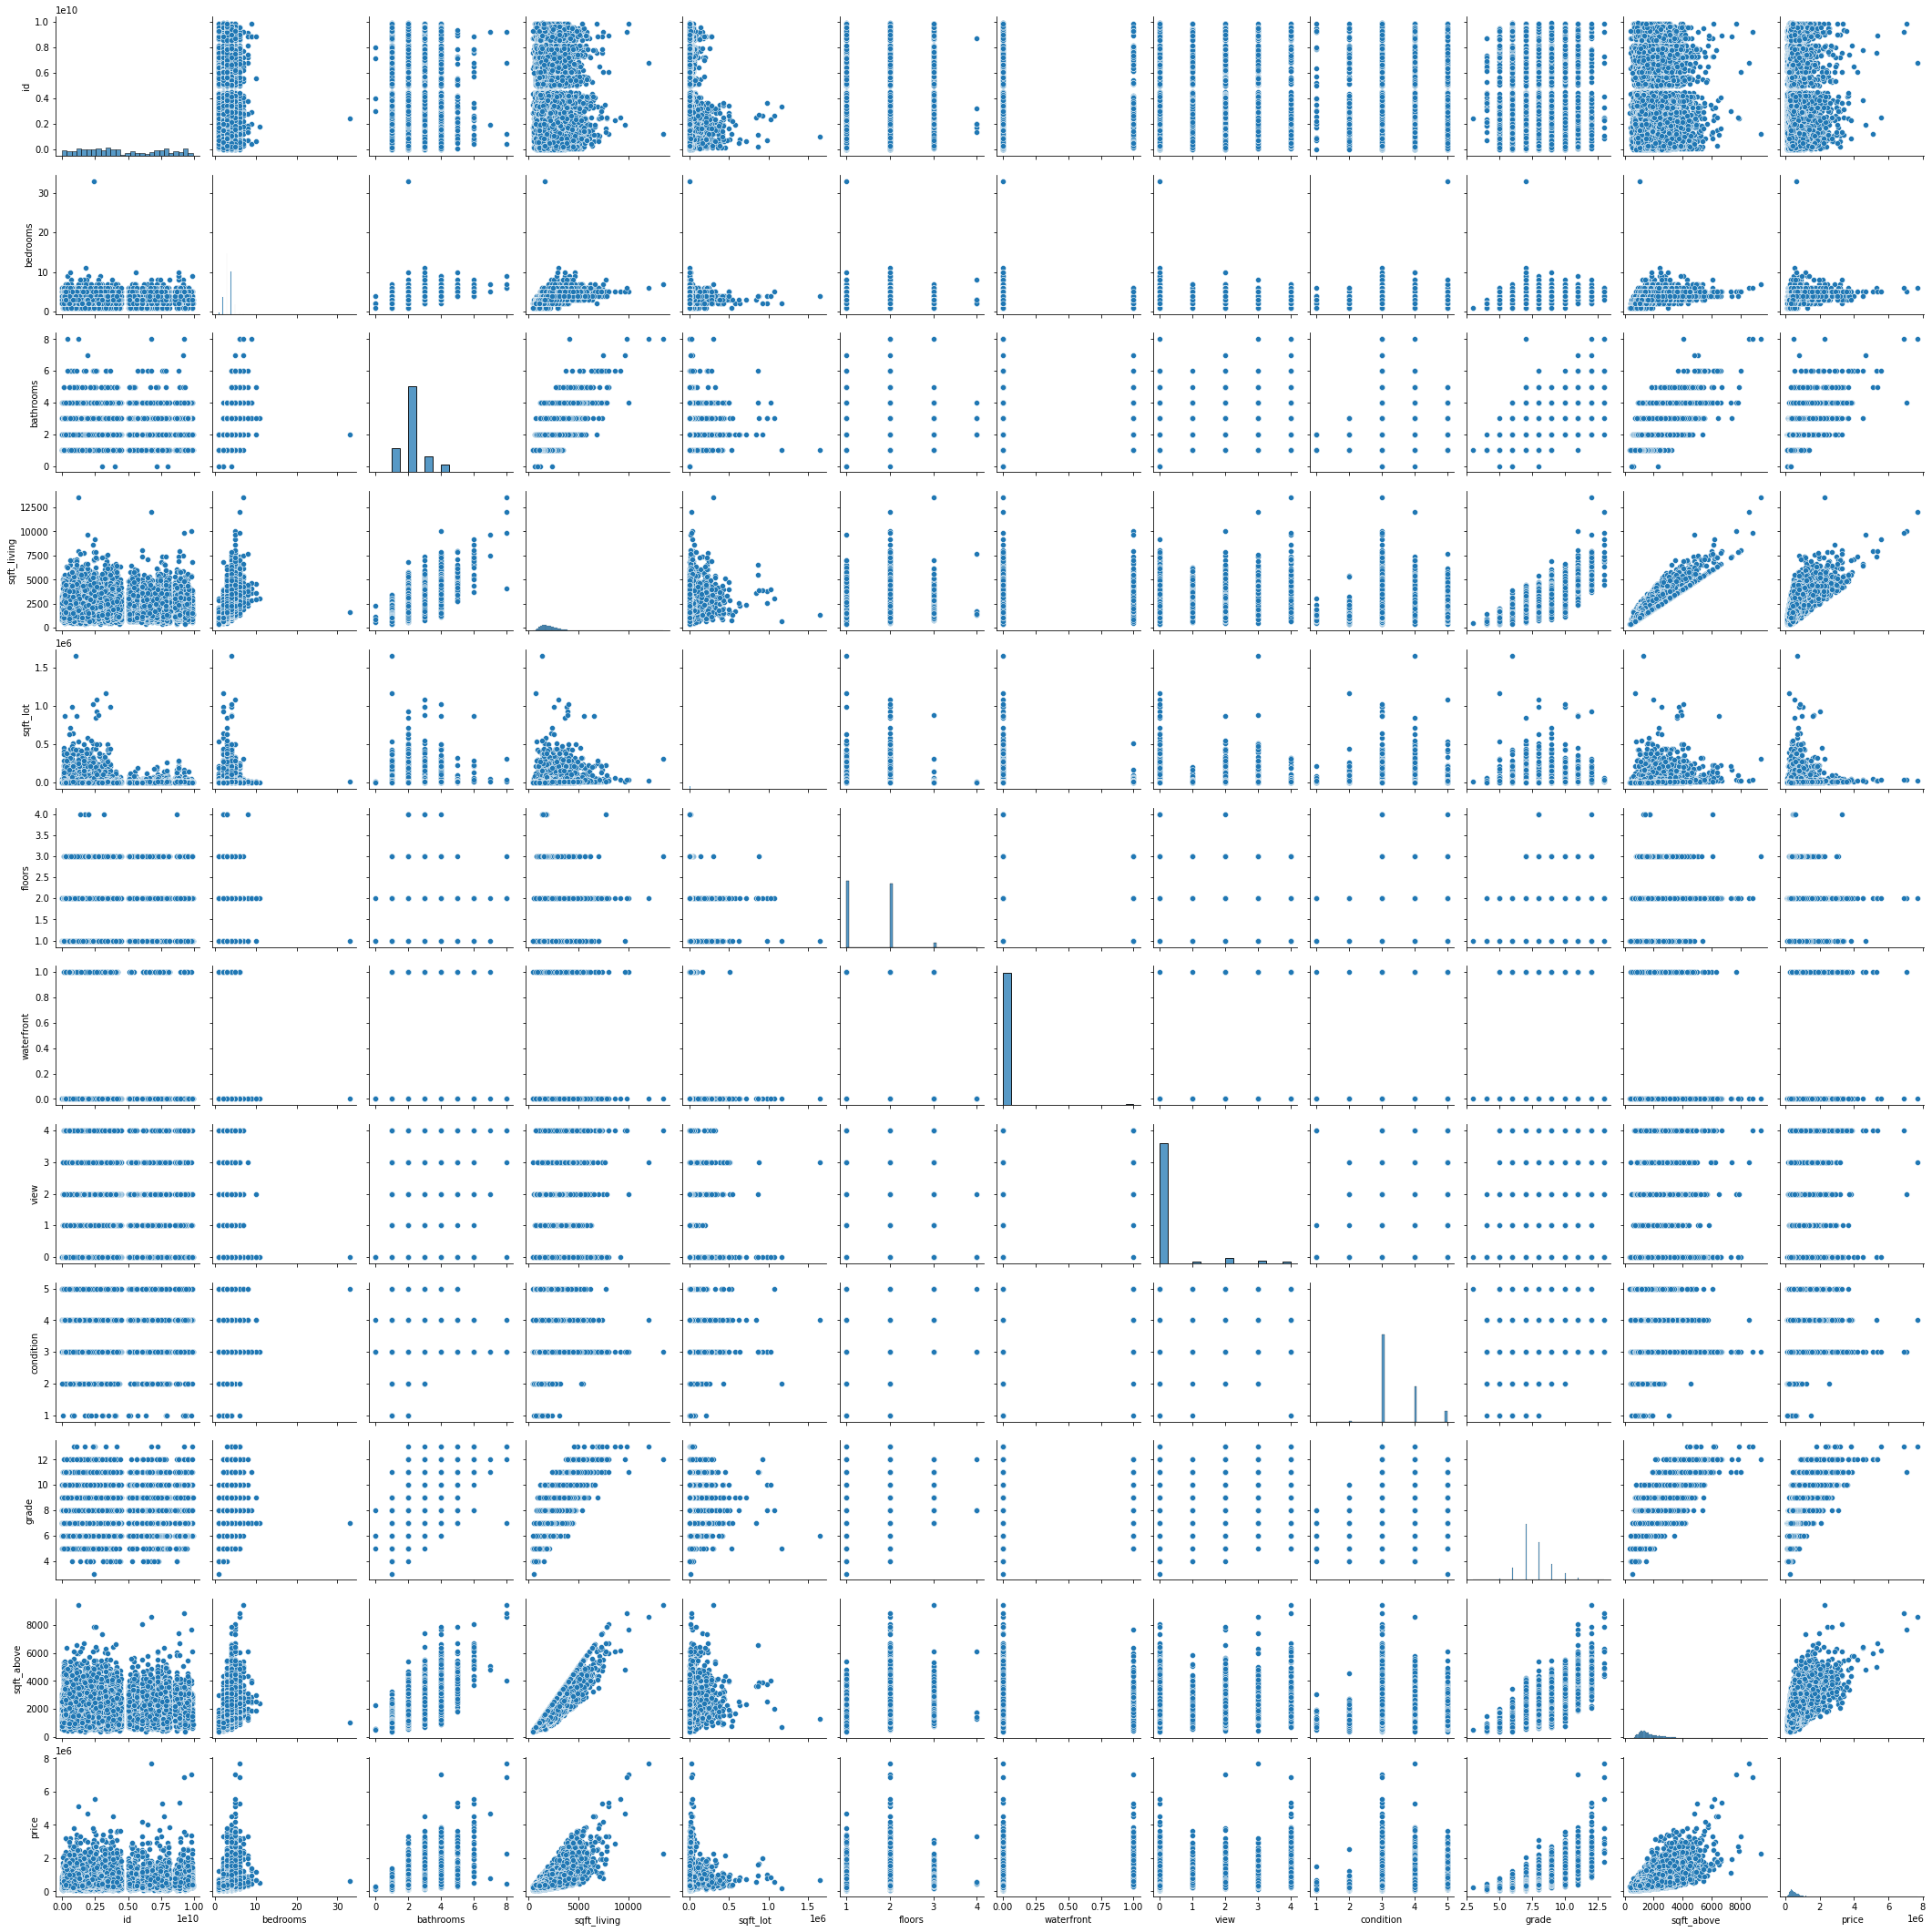

In [19]:
#Looking at the graphs above, grade, sqft_living & sqft_above have strong linear regression relationship. 
#Bathroom & sqft_living15 = somewhat weak linear relationship
#Zoom in to look at it closely
sns.pairplot(kc_data[num_vars [:11] + ['price']])

In [20]:
#Checking the linearcorrelation and use the highest score to build base model
corr_df = kc_data[num_vars + ['price']].corr()['price'].reset_index()
corr_df[corr_df['price'] > 0.5]

index     price
2       bathrooms  0.519628
3     sqft_living  0.701917
9           grade  0.667951
10     sqft_above  0.605368
17  sqft_living15  0.585241
19          price  1.000000

In [21]:
#base model
base_vars = ['sqft_living', 'grade', 'sqft_above']

In [22]:
df_sm = kc_data[base_vars + ['price']]
df_sm.head()

sqft_living  grade  sqft_above   price
0         1180      7        1180  221900
1         2570      7        2170  538000
2          770      6         770  180000
3         1960      7        1050  604000
4         1680      8        1680  510000

In [23]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sqft_living  21597 non-null  Int64
 1   grade        21597 non-null  Int64
 2   sqft_above   21597 non-null  Int64
 3   price        21597 non-null  Int64
dtypes: Int64(4)
memory usage: 759.4 KB


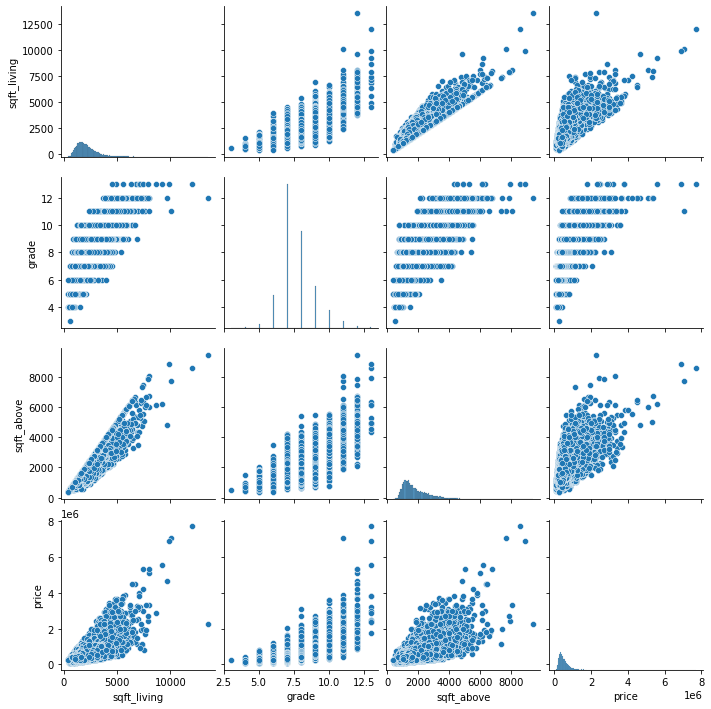

In [24]:
# checking the graphs to see if there are any anomaly, looks okay so far
sns.pairplot(df_sm)

In [25]:
#Build a baseline model with just a few variables

X = df_sm.drop('price', axis = 1)
y = df_sm['price']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

In [27]:
X_train.head()

sqft_living  grade  sqft_above
6405          1880      8        1880
937           2020      7        1310
19076         4720      9        3960
15201         1430      7        1430
13083         2270      8        1740

In [28]:
y_train.head()

6405     529000
937      253000
19076    745000
15201    545000
13083    390000
Name: price, dtype: Int64

In [29]:
#Check np array shape
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 3) (5400, 3)
(16197,) (5400,)


In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [31]:
linreg.fit(X_train, y_train)

LinearRegression()

In [32]:
#Produce Prediction
y_train_preds = linreg.predict(X_train)

In [33]:
y_val_preds = linreg.predict(X_val)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_train = r2_score(y_train, y_train_preds)
r2_val = r2_score(y_val, y_val_preds)

mse_train = mean_squared_error(y_train, y_train_preds)
mse_val = mean_squared_error(y_val, y_val_preds)

print(f'R2 train: {r2_train} R2 validation: {r2_val}')
print(f'MSE train: {mse_train:.3e} R2 validation: {mse_val:.3e}')


R2 train: 0.5440277996976239 R2 validation: 0.5327398199189005
MSE train: 6.119e+10 R2 validation: 6.411e+10


In [35]:
#Adjusted R2
def adj_r2_score(r2, n_samples, n_regressors):
    factor = (n_samples-1)/ (n_samples - n_regressors - 1)
    return 1 - ((1-r2) * factor)

In [36]:
adj_r2_train = adj_r2_score(r2_train, len(X_train), len(X_train.columns.tolist()))
adj_r2_val = adj_r2_score(r2_val, len(X_val), len(X_train.columns.tolist()))

print(f'Adj. R2 train: {adj_r2_train} Adj. R2 validation: {adj_r2_val}')
#Not much improvement

Adj. R2 train: 0.5439433238993835 Adj. R2 validation: 0.5324800384992854


Text(0, 0.5, 'Actual ($)')

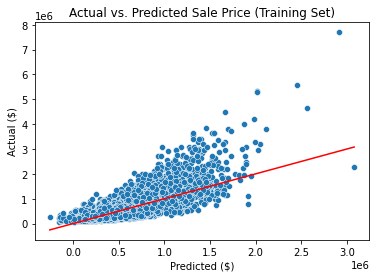

In [37]:
sns.scatterplot(x=y_train_preds, y=y_train)
sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')
plt.title('Actual vs. Predicted Sale Price (Training Set)')
plt.xlabel('Predicted ($)')
plt.ylabel('Actual ($)')

Text(0, 0.5, 'Actual ($)')

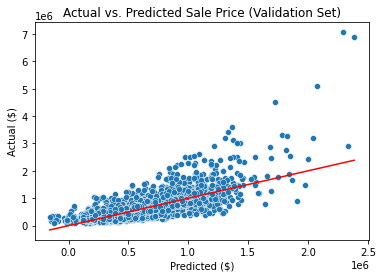

In [38]:
y_val_preds = linreg.predict(X_val)
sns.scatterplot(x=y_val_preds, y=y_val)
sns.lineplot(x=y_val_preds, y=y_val_preds, color='red')
plt.title('Actual vs. Predicted Sale Price (Validation Set)')
plt.xlabel('Predicted ($)')
plt.ylabel('Actual ($)')

<AxesSubplot:xlabel='price', ylabel='Count'>

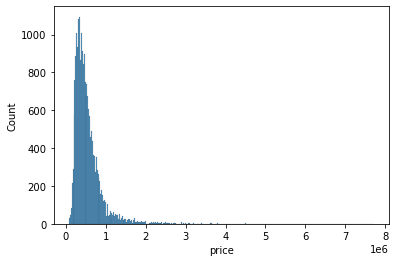

In [39]:
sns.histplot(y)

> It's worth noting that the main reason for log transforming our variables is due to non-linear relationships, and convert our distribution to more of normal distribution as you see below. 
>
> This is not quite the same thing as trying to account for outliers, as it is possible to have normal distributions with some outliers.

<AxesSubplot:xlabel='price', ylabel='Count'>

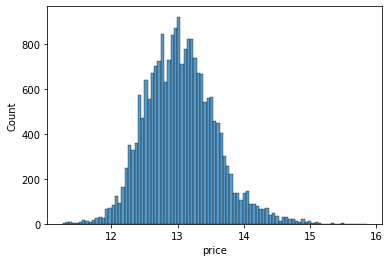

In [40]:
#Log transform due to some outliers
y = np.log1p(y) #log 1 + number
sns.histplot(y)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_preds = linreg.predict(X_train)
y_val_preds = linreg.predict(X_val)

> It *looks* better, but we should probably also check the curve fit using our metrics.

Text(0, 0.5, 'Actual')

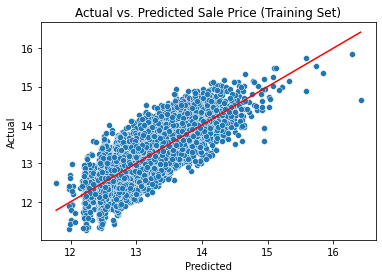

In [42]:
#Checking if the train set improved
sns.scatterplot(x=y_train_preds, y=y_train)
sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')
plt.title('Actual vs. Predicted Sale Price (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#Much better

Text(0, 0.5, 'Actual')

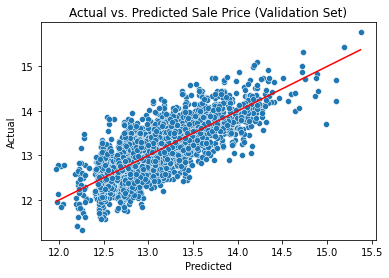

In [43]:
#Checking if the test/validation set improved
y_val_preds = linreg.predict(X_val)
sns.scatterplot(x=y_val_preds, y=y_val)
sns.lineplot(x=y_val_preds, y=y_val_preds, color='red')
plt.title('Actual vs. Predicted Sale Price (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [44]:
#Cross Validation CV Test
from sklearn.model_selection import cross_validate
scores = cross_validate(linreg, X.astype(float), y.astype(float), cv=5, 
                       scoring=['r2', 'neg_mean_squared_error'],
                       return_train_score=True)
scores


{'fit_time': array([0.00332212, 0.00323296, 0.00253224, 0.00295806, 0.00234389]),
 'score_time': array([0.00077009, 0.00195003, 0.00097466, 0.0007298 , 0.00077891]),
 'test_r2': array([0.5562967 , 0.54959361, 0.53890325, 0.56291139, 0.60765179]),
 'train_r2': array([0.56633812, 0.56773869, 0.57012636, 0.56462174, 0.55250309]),
 'test_neg_mean_squared_error': array([-0.12782403, -0.1243565 , -0.12288351, -0.12618492, -0.10308573]),
 'train_neg_mean_squared_error': array([-0.11904068, -0.11992144, -0.1202776 , -0.11945443, -0.12524392])}

In [45]:
#CV average score
avg_scores = {k:np.mean(v) for k, v in scores.items()}
avg_scores

{'fit_time': 0.0028778553009033204,
 'score_time': 0.0010406970977783203,
 'test_r2': 0.5630713505419722,
 'train_r2': 0.5642655993438318,
 'test_neg_mean_squared_error': -0.12086693845134588,
 'train_neg_mean_squared_error': -0.12078761410254946}

> Note that these are called "evaluation metrics", as "validadtion" has a fairly specific meaning, i.e. between train/validation/test  splits

In [46]:
#Create evaluation list for all of validation test

eval_list = list()
avg_scores['dataset'] = 'base'
avg_scores['n_features'] = len(X.columns)
eval_list.append(avg_scores)
pd.DataFrame(eval_list)

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.002878    0.001041  0.563071  0.564266                    -0.120867   

   train_neg_mean_squared_error dataset  n_features  
0                     -0.120788    base           3

In [47]:
#Define the function as we will be using the above metrics over and over using different variables

def get_avg_cv_scores(X, y, regmodel, setname, scoring=None):
    if scoring is None:
        scoring = ['r2', 'neg_mean_squared_error']
    scores = cross_validate(regmodel, X, y, cv=5,
                           scoring=scoring,
                           return_train_score=True)
    avg_scores = {k:np.mean(v) for k, v in scores.items()}
    avg_scores['dataset'] = setname
    avg_scores['n_features'] = len(X.columns)
    return avg_scores

In [48]:
# Introduce new continuous features = all of the sqft, yr_build, yr_renovated, lat, long
# Then analyse to see which one to include and exclude

cont_vars = ['sqft_lot', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long']

In [49]:
df_cont = kc_data[cont_vars + ['price']]
df_cont.head()

sqft_lot  sqft_above  yr_built  yr_renovated  lat  long   price
0      5650        1180      1955             0   48  -122  221900
1      7242        2170      1951          1991   48  -122  538000
2     10000         770      1933             0   48  -122  180000
3      5000        1050      1965             0   48  -122  604000
4      8080        1680      1987             0   48  -122  510000

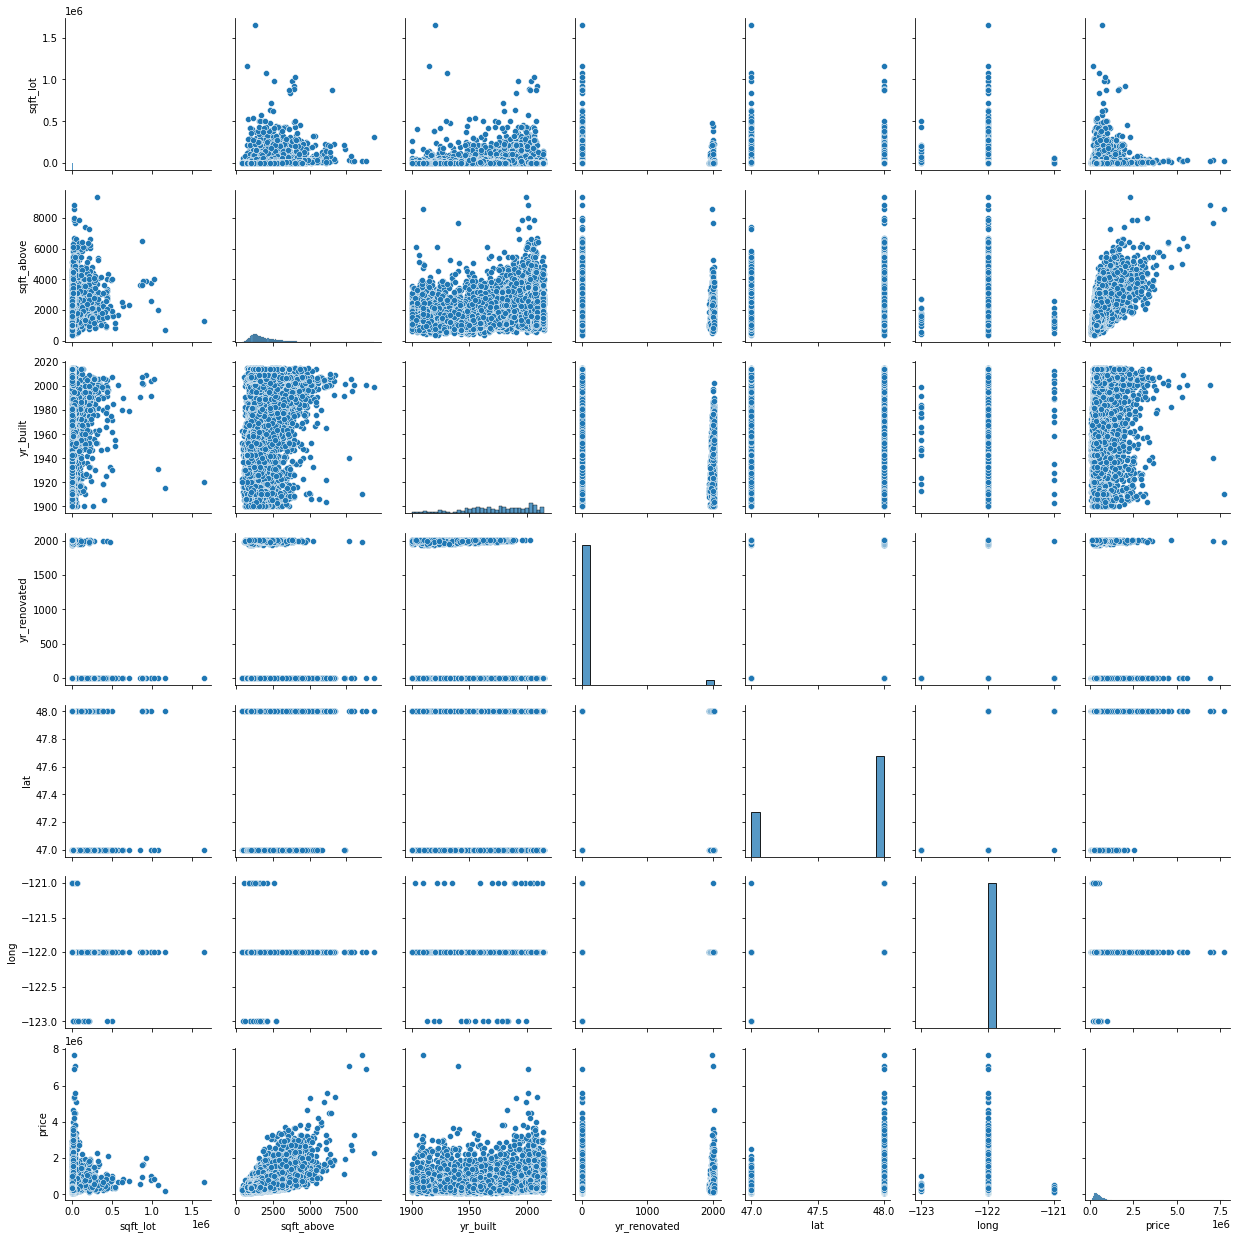

In [50]:
#lets check the plot
sns.pairplot(df_cont)

In [51]:
kc_data[cont_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sqft_lot      21597 non-null  Int64
 1   sqft_above    21597 non-null  Int64
 2   yr_built      21597 non-null  Int64
 3   yr_renovated  21597 non-null  Int64
 4   lat           21597 non-null  Int64
 5   long          21597 non-null  Int64
dtypes: Int64(6)
memory usage: 1.1 MB


In [52]:
kc_data[cont_vars].describe()

sqft_lot    sqft_above      yr_built  yr_renovated           lat  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04   1788.596842   1970.999676     68.758207     47.694356   
std    4.141264e+04    827.759761     29.375234    364.037499      0.460690   
min    5.200000e+02    370.000000   1900.000000      0.000000     47.000000   
25%    5.040000e+03   1190.000000   1951.000000      0.000000     47.000000   
50%    7.618000e+03   1560.000000   1975.000000      0.000000     48.000000   
75%    1.068500e+04   2210.000000   1997.000000      0.000000     48.000000   
max    1.651359e+06   9410.000000   2015.000000   2015.000000     48.000000   

               long  
count  21597.000000  
mean    -122.000046  
std        0.040258  
min     -123.000000  
25%     -122.000000  
50%     -122.000000  
75%     -122.000000  
max     -121.000000

> Just a reminder that it is not compulsory to remove collinear features. 
>
> Recommended reading:
> - https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/ (section titled Do I Have to Fix Multicollinearity?)

In [53]:
#Check for multicolinearity

kc_data[cont_vars].corr()[abs(kc_data[cont_vars].corr()) > 0.7]

#sqft_living and sqft_above have high multicolinearity, I will be removing one of them

sqft_lot  sqft_above  yr_built  yr_renovated  lat  long
sqft_lot           1.0         NaN       NaN           NaN  NaN   NaN
sqft_above         NaN         1.0       NaN           NaN  NaN   NaN
yr_built           NaN         NaN       1.0           NaN  NaN   NaN
yr_renovated       NaN         NaN       NaN           1.0  NaN   NaN
lat                NaN         NaN       NaN           NaN  1.0   NaN
long               NaN         NaN       NaN           NaN  NaN   1.0

> Why is this here? What to make of this plot?

<AxesSubplot:xlabel='yr_built', ylabel='yr_renovated'>

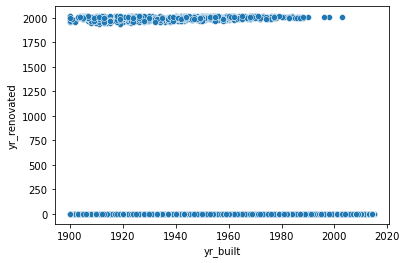

In [54]:
sns.scatterplot(x=kc_data['yr_built'], y=kc_data['yr_renovated'])

In [55]:
#Lets add base+cont_vars to our linreg test and remove sqft_above due to high colinearity with sqft_living
cont_vars.remove('sqft_above')
X = kc_data[base_vars + cont_vars]
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

In [56]:
#Check np array shape
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 8) (5400, 8)
(16197,) (5400,)


In [57]:
linreg = LinearRegression()
avg_scores = get_avg_cv_scores(X.astype(float), y.astype(float), linreg, 'w/cont. feats')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)
#Pretty good improvement for R2 from 0.56 to 0.75

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.002878    0.001041  0.563071  0.564266                    -0.120867   
1  0.004010    0.000708  0.754208  0.756035                    -0.067907   

   train_neg_mean_squared_error        dataset  n_features  
0                     -0.120788           base           3  
1                     -0.067624  w/cont. feats           8

In [58]:
#Running a quick info, so I can grab the name of features on the next step
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21597 non-null  Int64 
 1   date           21597 non-null  object
 2   price          21597 non-null  Int64 
 3   bedrooms       21597 non-null  Int64 
 4   bathrooms      21597 non-null  Int64 
 5   sqft_living    21597 non-null  Int64 
 6   sqft_lot       21597 non-null  Int64 
 7   floors         21597 non-null  Int64 
 8   waterfront     21597 non-null  Int64 
 9   view           21597 non-null  Int64 
 10  condition      21597 non-null  Int64 
 11  grade          21597 non-null  Int64 
 12  sqft_above     21597 non-null  Int64 
 13  sqft_basement  21597 non-null  Int64 
 14  yr_built       21597 non-null  Int64 
 15  yr_renovated   21597 non-null  Int64 
 16  zipcode        21597 non-null  Int64 
 17  lat            21597 non-null  Int64 
 18  long           21597 non-n

In [59]:
# Now I am creating discrete variables, exclude 'grade' as it is already part of base_vars to avoid the double-up 

disc_vars = ['condition', 'bedrooms', 'bathrooms', 'floors', 'view']
kc_data[disc_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   condition  21597 non-null  Int64
 1   bedrooms   21597 non-null  Int64
 2   bathrooms  21597 non-null  Int64
 3   floors     21597 non-null  Int64
 4   view       21597 non-null  Int64
dtypes: Int64(5)
memory usage: 949.2 KB


In [60]:
kc_data[disc_vars].describe()

condition      bedrooms     bathrooms        floors          view
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000
mean       3.409825      3.373200      2.059777      1.534750      0.233181
std        0.650546      0.926299      0.754435      0.554376      0.764673
min        1.000000      1.000000      0.000000      1.000000      0.000000
25%        3.000000      3.000000      2.000000      1.000000      0.000000
50%        3.000000      3.000000      2.000000      2.000000      0.000000
75%        4.000000      4.000000      2.000000      2.000000      0.000000
max        5.000000     33.000000      8.000000      4.000000      4.000000

In [61]:
df_disc = kc_data[disc_vars + ['price']]
df_disc.head()

condition  bedrooms  bathrooms  floors  view   price
0          3         3          1       1     0  221900
1          3         3          2       2     0  538000
2          3         2          1       1     0  180000
3          5         4          3       1     0  604000
4          3         3          2       1     0  510000

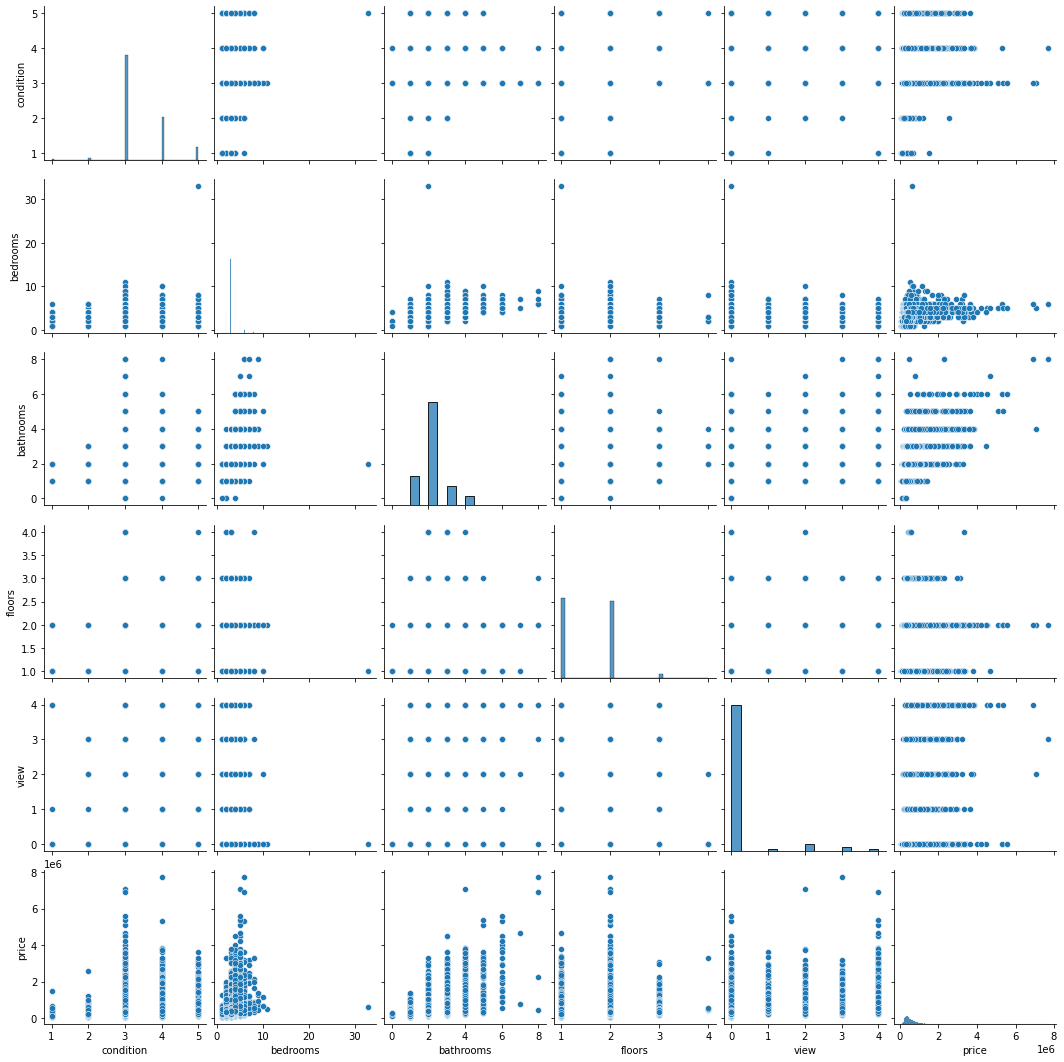

In [62]:
sns.pairplot(df_disc)

In [63]:
X = kc_data[base_vars + cont_vars + disc_vars]
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

In [64]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(16197, 13) (5400, 13)
(16197,) (5400,)


In [65]:
linreg = LinearRegression()
avg_scores = get_avg_cv_scores(X.astype(float), y.astype(float), linreg, 'base+cont+disc. feats')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)
#R2 score just slightly better from 0.756 to 0.775 with 13 features

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.002878    0.001041  0.563071  0.564266                    -0.120867   
1  0.004010    0.000708  0.754208  0.756035                    -0.067907   
2  0.007274    0.000767  0.773267  0.775057                    -0.062616   

   train_neg_mean_squared_error                dataset  n_features  
0                     -0.120788                   base           3  
1                     -0.067624          w/cont. feats           8  
2                     -0.062350  base+cont+disc. feats          13

In [66]:
#Next let's try RFE Recursive Feature Elimination with 8 features
from sklearn.feature_selection import RFE

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
n_feats = 8
selector = RFE(linreg, n_features_to_select=n_feats, step=1)
selector = selector.fit(X_train, y_train)


In [67]:
selector.ranking_

array([3, 1, 5, 6, 2, 4, 1, 1, 1, 1, 1, 1, 1])

In [68]:
selector.support_

array([False,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True])

In [69]:
top_feats = X.columns[selector.support_]
top_feats

Index(['grade', 'lat', 'long', 'condition', 'bedrooms', 'bathrooms', 'floors',
       'view'],
      dtype='object')

In [70]:
X = kc_data[cont_vars + base_vars + disc_vars]
X = X[top_feats]
X.head()

grade  lat  long  condition  bedrooms  bathrooms  floors  view
0      7   48  -122          3         3          1       1     0
1      7   48  -122          3         3          2       2     0
2      6   48  -122          3         2          1       1     0
3      7   48  -122          5         4          3       1     0
4      8   48  -122          3         3          2       1     0

In [71]:
linreg = LinearRegression()
avg_scores = get_avg_cv_scores(X.astype(float), y.astype(float), linreg, 'RFE8')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)
#actually worse from 0.775 to 0.596

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.002878    0.001041  0.563071  0.564266                    -0.120867   
1  0.004010    0.000708  0.754208  0.756035                    -0.067907   
2  0.007274    0.000767  0.773267  0.775057                    -0.062616   
3  0.005326    0.000747  0.721305  0.724734                    -0.076916   

   train_neg_mean_squared_error                dataset  n_features  
0                     -0.120788                   base           3  
1                     -0.067624          w/cont. feats           8  
2                     -0.062350  base+cont+disc. feats          13  
3                     -0.076297                   RFE8           8

In [72]:
#Testing on RFE to see how many features would produce the best scores

X = kc_data[cont_vars + base_vars + disc_vars]

train_r2_scores = list()
train_adj_r2_scores = list()
train_mse_values = list()

test_r2_scores = list()
test_adj_r2_scores = list()
test_mse_values = list()

n_feat_values = list()

for n_feats in range(3, len(X.columns)):
    X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
    selector = RFE(linreg, n_features_to_select=n_feats, step=1)
    selector = selector.fit(X_train, y_train)
    
    top_feats = X.columns[selector.support_]
    
    X_sm = X[top_feats]
    X_train, X_val, y_train, y_val = train_test_split(X_sm, y, shuffle=True, test_size=0.25, random_state=42)
    
    sm_linreg = LinearRegression()
    sm_linreg.fit(X_train, y_train)
    
    y_train_preds = sm_linreg.predict(X_train)
    y_val_preds = sm_linreg.predict(X_val)
    
    train_r2_scores.append(r2_score(y_train, y_train_preds))
    train_mse_values.append(mean_squared_error(y_train, y_train_preds))
    
    test_r2_scores.append(r2_score(y_val, y_val_preds))
    test_mse_values.append(mean_squared_error(y_val, y_val_preds))
    
    n_feat_values.append(n_feats)

Text(0.5, 1.0, 'R2 scores')

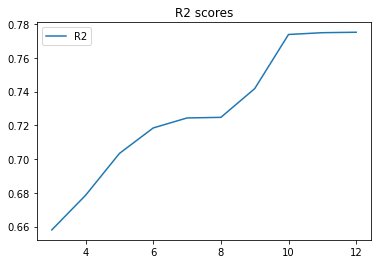

In [73]:
sns.lineplot(x=n_feat_values, y=train_r2_scores, label='R2')
plt.title('R2 scores')
#Looks like 10 features would produce the best score, lets put it to a test next

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
n_feats = 10
selector = RFE(linreg, n_features_to_select=n_feats, step=1)
selector = selector.fit(X_train, y_train)


In [75]:
selector.ranking_

array([4, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1])

In [76]:
selector.support_

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [77]:
top_feats = X.columns[selector.support_]
top_feats

Index(['yr_built', 'lat', 'long', 'sqft_living', 'grade', 'condition',
       'bedrooms', 'bathrooms', 'floors', 'view'],
      dtype='object')

In [78]:
X = kc_data[cont_vars + base_vars + disc_vars]
X = X[top_feats]

linreg = LinearRegression()
avg_scores = get_avg_cv_scores(X.astype(float), y.astype(float), linreg, 'RFE10')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)
#Much better just slightly less than 13 features

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.002878    0.001041  0.563071  0.564266                    -0.120867   
1  0.004010    0.000708  0.754208  0.756035                    -0.067907   
2  0.007274    0.000767  0.773267  0.775057                    -0.062616   
3  0.005326    0.000747  0.721305  0.724734                    -0.076916   
4  0.005871    0.001145  0.771318  0.772831                    -0.063166   

   train_neg_mean_squared_error                dataset  n_features  
0                     -0.120788                   base           3  
1                     -0.067624          w/cont. feats           8  
2                     -0.062350  base+cont+disc. feats          13  
3                     -0.076297                   RFE8           8  
4                     -0.062968                  RFE10          10

In [79]:
# Now lets add categorical features, only 2 features left that we haven't use 'waterfront' and 'zipcode'
# I am not using ID & Date at this stage

cat_vars = ['waterfront', 'zipcode']
kc_data[cat_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   waterfront  21597 non-null  Int64
 1   zipcode     21597 non-null  Int64
dtypes: Int64(2)
memory usage: 379.8 KB


In [80]:
#I have cleaned the data at the very beginning, but will double-check if there's any missing values
kc_data[cat_vars].isnull().sum()
#No missing value

waterfront    0
zipcode       0
dtype: int64

In [81]:
kc_data[cat_vars].describe()

waterfront       zipcode
count  21597.000000  21597.000000
mean       0.006760  98077.951845
std        0.081944     53.513072
min        0.000000  98001.000000
25%        0.000000  98033.000000
50%        0.000000  98065.000000
75%        0.000000  98118.000000
max        1.000000  98199.000000

In [82]:
#Now I am using OneHotEncoder to help transform categorical datas/features

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first')
enc.fit(kc_data[cat_vars])
ohe_cols = enc.transform(kc_data[cat_vars])
ohe_cols.toarray().shape

(21597, 70)

In [83]:
ohe_df = pd.DataFrame(ohe_cols.toarray(), columns=enc.get_feature_names_out(cat_vars))
ohe_df.head()

waterfront_1  zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0           0.0            0.0            0.0            0.0            0.0   
1           0.0            0.0            0.0            0.0            0.0   
2           0.0            0.0            0.0            0.0            0.0   
3           0.0            0.0            0.0            0.0            0.0   
4           0.0            0.0            0.0            0.0            0.0   

   zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   ...  zipcode_98146  zipcode_98148  zipcode_98155  zipcode_98166  \
0  ...            0.0            0.0            0.0            0.0   
1  ...            0.0            0.0            0.0            0.0   
2  ...            0.0            0.0            0.0            0.0   
3  ...            0.0            0.0            0.0            0.0   
4  ...            0.0            0.0            0.0            0.0   

   zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  \
0            0.0            0.0            1.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   zipcode_98199  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 70 columns]

In [84]:
#Combined OHE with the last dataframe that I used before RFE
X = kc_data[base_vars + cont_vars + disc_vars].join(ohe_df)
X.head()

sqft_living  grade  sqft_above  sqft_lot  yr_built  yr_renovated  lat  \
0         1180      7        1180      5650      1955             0   48   
1         2570      7        2170      7242      1951          1991   48   
2          770      6         770     10000      1933             0   48   
3         1960      7        1050      5000      1965             0   48   
4         1680      8        1680      8080      1987             0   48   

   long  condition  bedrooms  ...  zipcode_98146  zipcode_98148  \
0  -122          3         3  ...            0.0            0.0   
1  -122          3         3  ...            0.0            0.0   
2  -122          3         2  ...            0.0            0.0   
3  -122          5         4  ...            0.0            0.0   
4  -122          3         3  ...            0.0            0.0   

   zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  \
0            0.0            0.0            0.0            0.0            1.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   zipcode_98188  zipcode_98198  zipcode_98199  
0            0.0            0.0            0.0  
1            0.0            0.0            0.0  
2            0.0            0.0            0.0  
3            0.0            0.0            0.0  
4            0.0            0.0            0.0  

[5 rows x 83 columns]

In [85]:
linreg = LinearRegression()
avg_scores = get_avg_cv_scores(X.astype(float), y.astype(float), linreg, 'all variables')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)
#Great result with R2 from 0.77 to 0.87, proven that categorial variables such as zipcode and waterfront features are important

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.002878    0.001041  0.563071  0.564266                    -0.120867   
1  0.004010    0.000708  0.754208  0.756035                    -0.067907   
2  0.007274    0.000767  0.773267  0.775057                    -0.062616   
3  0.005326    0.000747  0.721305  0.724734                    -0.076916   
4  0.005871    0.001145  0.771318  0.772831                    -0.063166   
5  0.076291    0.001294  0.870394  0.873057                    -0.035793   

   train_neg_mean_squared_error                dataset  n_features  
0                     -0.120788                   base           3  
1                     -0.067624          w/cont. feats           8  
2                     -0.062350  base+cont+disc. feats          13  
3                     -0.076297                   RFE8           8  
4                     -0.062968                  RFE10          10  
5                     -0.035186          all variables          83

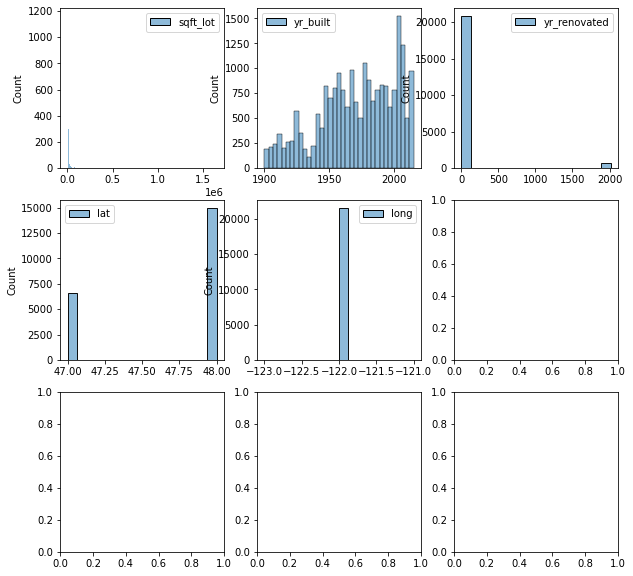

In [86]:
#Now we will transform our input variables, also a quick check on continuous variable to see if there are any 
#similar pattern that we can get rid off in order to produce better result

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(len(cont_vars)):
    sns.histplot(kc_data[[cont_vars[i]]], ax=ax[i // 3, i % 3])


In [87]:
#Pattern seems okay, however sqft_lot graph doesn't look quite right, will check the data quickly

kc_data['sqft_lot'].value_counts(dropna=False)
#value below look normal, maybe just the graph tend to clump all the data together due to the similar value

5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
20672      1
3434       1
914        1
5855       1
<NA>       0
Name: sqft_lot, Length: 9777, dtype: Int64

In [88]:
#Next I am going to log transform all of the columns due to some skewness in the data, as we also did a log on y, 
#so to speak to keep the score/value consistents, not using 'long' as log doesn't work on negative value
long_vars = ['long']
log_vars = [c for c in cont_vars if c not in long_vars]
X = np.log1p(kc_data[log_vars]).join(kc_data[long_vars + base_vars + disc_vars]).join(ohe_df)

X.head()

sqft_lot  yr_built  yr_renovated      lat  long  sqft_living  grade  \
0  8.639588  7.578657           0.0  3.89182  -122         1180      7   
1  8.887791   7.57661      7.596894  3.89182  -122         2570      7   
2   9.21044  7.567346           0.0  3.89182  -122          770      6   
3  8.517393  7.583756           0.0  3.89182  -122         1960      7   
4  8.997271  7.594884           0.0  3.89182  -122         1680      8   

   sqft_above  condition  bedrooms  ...  zipcode_98146  zipcode_98148  \
0        1180          3         3  ...            0.0            0.0   
1        2170          3         3  ...            0.0            0.0   
2         770          3         2  ...            0.0            0.0   
3        1050          5         4  ...            0.0            0.0   
4        1680          3         3  ...            0.0            0.0   

   zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  \
0            0.0            0.0            0.0            0.0            1.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   zipcode_98188  zipcode_98198  zipcode_98199  
0            0.0            0.0            0.0  
1            0.0            0.0            0.0  
2            0.0            0.0            0.0  
3            0.0            0.0            0.0  
4            0.0            0.0            0.0  

[5 rows x 83 columns]

In [89]:
linreg = LinearRegression()
avg_scores = get_avg_cv_scores(X.astype(float), y.astype(float), linreg, 'all variables log')
eval_list.append(avg_scores)
pd.DataFrame(eval_list)
#slightly better after the log, I am happy with the outcome of R2 at 0.876

fit_time  score_time   test_r2  train_r2  test_neg_mean_squared_error  \
0  0.002878    0.001041  0.563071  0.564266                    -0.120867   
1  0.004010    0.000708  0.754208  0.756035                    -0.067907   
2  0.007274    0.000767  0.773267  0.775057                    -0.062616   
3  0.005326    0.000747  0.721305  0.724734                    -0.076916   
4  0.005871    0.001145  0.771318  0.772831                    -0.063166   
5  0.076291    0.001294  0.870394  0.873057                    -0.035793   
6  0.074590    0.004109  0.873578  0.876233                    -0.034917   

   train_neg_mean_squared_error                dataset  n_features  
0                     -0.120788                   base           3  
1                     -0.067624          w/cont. feats           8  
2                     -0.062350  base+cont+disc. feats          13  
3                     -0.076297                   RFE8           8  
4                     -0.062968                  RFE10          10  
5                     -0.035186          all variables          83  
6                     -0.034306      all variables log          83

In [90]:
#Lets do last check on our model
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Actual ($)')

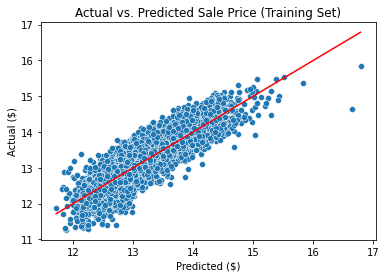

In [91]:
#Train set
sns.scatterplot(x=y_train_preds, y=y_train)
sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')
plt.title('Actual vs. Predicted Sale Price (Training Set)')
plt.xlabel('Predicted ($)')
plt.ylabel('Actual ($)')

Text(0, 0.5, 'Actual ($)')

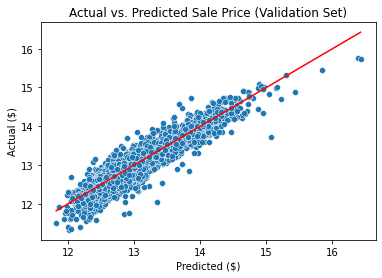

In [92]:
#Validation set
y_val_preds = linreg.predict(X_val)
sns.scatterplot(x=y_val_preds, y=y_val)
sns.lineplot(x=y_val_preds, y=y_val_preds, color='red')
plt.title('Actual vs. Predicted Sale Price (Validation Set)')
plt.xlabel('Predicted ($)')
plt.ylabel('Actual ($)')

In [93]:
#Next we will run the linear model in 'Price' as the target variable in statsmodel 
#to see if the results are similar to our previous R2 & MSE analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

X_int = sm.add_constant(X)
model = sm.OLS(y.astype(float), X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1832.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:48:32   Log-Likelihood:                 5753.7
No. Observations:               21597   AIC:                        -1.134e+04
Df Residuals:                   21513   BIC:                        -1.067e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -29.3167      4.566     -6.420      0.000     -38.267     -20.366
sqft_lot          0.0637      0.002     30.005      0.000       0.060       0.068
yr_built          0.1455      0.141      1.031      0.303      -0.131       0.422
yr_renovated      0.0105      0.001     10.877      0.000       0.009       0.012
lat               6.8049      0.422     16.125      0.000       5.978       7.632
long             -0.1014      0.034     -3.014      0.003      -0.167      -0.035
sqft_living       0.0002   3.94e-06     38.912      0.000       0.000       0.000
grade             0.1027      0.002     50.142      0.000       0.099       0.107
sqft_above     6.178e-05   4.17e-06     14.822      0.000    5.36e-05       7e-05
condition         0.0562      0.002     25.391      0.000       0.052       0.061
bedrooms          0.0035      0.002      1.997      0.046    6.52e-05       0.007
bathrooms         0.0181      0.003      7.090      0.000       0.013       0.023
floors            0.0069      0.003      2.059      0.039       0.000       0.013
view              0.0673      0.002     33.953      0.000       0.063       0.071
waterfront_1      0.4324      0.017     25.448      0.000       0.399       0.466
zipcode_98002    -0.0266      0.016     -1.618      0.106      -0.059       0.006
zipcode_98003     0.0198      0.015      1.334      0.182      -0.009       0.049
zipcode_98004     0.9866      0.017     58.655      0.000       0.954       1.020
zipcode_98005     0.6107      0.019     31.334      0.000       0.572       0.649
zipcode_98006     0.5116      0.016     32.795      0.000       0.481       0.542
zipcode_98007     0.5238      0.020     25.660      0.000       0.484       0.564
zipcode_98008     0.5228      0.017     30.474      0.000       0.489       0.556
zipcode_98010     0.2172      0.021     10.298      0.000       0.176       0.259
zipcode_98011     0.3358      0.019     18.014      0.000       0.299       0.372
zipcode_98014     0.1418      0.022      6.505      0.000       0.099       0.184
zipcode_98019     0.1926      0.019     10.208      0.000       0.156       0.230
zipcode_98022     0.0290      0.016      1.846      0.065      -0.002       0.060
zipcode_98023    -0.0201      0.013     -1.566      0.117      -0.045       0.005
zipcode_98024     0.2507      0.025     10.111      0.000       0.202       0.299
zipcode_98027     0.4190      0.015     28.101      0.000       0.390       0.448
zipcode_98028     0.2968      0.017     17.352      0.000       0.263       0.330
zipcode_98029     0.4928      0.017     29.494      0.000       0.460       0.526
zipcode_98030     0.0678      0.015      4.467      0.000       0.038       0.098
zipcode_98031     0.0862      0.015      5.779      0.000       0.057       0.115
zipcode_98032    -0.0379      0.019     -1.961   

In [94]:
# Another check on coefficients and intercept are the same as those from Statsmodels
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
print(linreg.intercept_)
print(linreg.coef_)
print(r2_score(y, y_pred))
#Same results/scores = model is working

-29.316667305035416
[ 6.37053628e-02  1.45495064e-01  1.05034787e-02  6.80488016e+00
 -1.01412299e-01  1.53173404e-04  1.02719427e-01  6.17809613e-05
  5.62384062e-02  3.52723419e-03  1.81392871e-02  6.86746538e-03
  6.72532178e-02  4.32434859e-01 -2.66455728e-02  1.97668414e-02
  9.86580606e-01  6.10689755e-01  5.11590991e-01  5.23803399e-01
  5.22780521e-01  2.17184192e-01  3.35809211e-01  1.41774629e-01
  1.92558233e-01  2.90358295e-02 -2.01451898e-02  2.50739634e-01
  4.19016235e-01  2.96815799e-01  4.92836937e-01  6.78206266e-02
  8.61588237e-02 -3.78688712e-02  6.54531787e-01  4.13289039e-01
  1.91806946e-01  1.11156119e+00  7.46332251e-01  6.59442577e-02
  2.94573364e-01  5.19896683e-01  4.51751679e-01  1.55386297e-01
  2.31943705e-01  1.69503528e-01  3.13917899e-01  2.99625711e-01
  2.53516444e-01  3.48021235e-01  4.33371427e-01  4.41849968e-01
  2.88287936e-01  2.95053558e-02  8.55920476e-01  7.02465502e-01
  8.45185242e-01  1.99157961e-01  7.25142739e-01  2.36938049e-01
  8.9

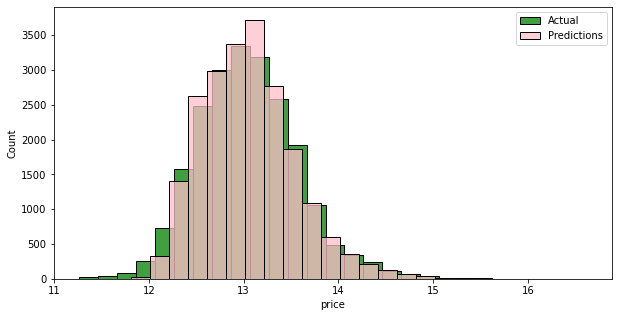

In [95]:
# As a final check, compare ranges of predictions to the actual values
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(y, label='Actual', color='green', binwidth=0.2)
sns.histplot(y_pred, label='Predictions', color='pink', binwidth=0.2)
plt.legend()
#Results below are pretty close, great :)

> Another useful output from a one-hot encoding is to identify the most important areas (zip codes). 
>
> Let's consider how a one-hot encoding works. As the column values are 1 or 0, the dependent variable will be higher by the coefficient of each one-hot encoded column. 
>
> So where the OHE coefficients are the largest, the dependent variable (price) is most affected, whether the ZIP code leads to an increase in the price (positive coefficient, or decrease (negative coefficient). When the OHE coefficients are close to zero, the area is basically very similar to the typical area.
>
> In my model, the ZIP codes with the largest coefficients turned out to be the areas with the highest house prices, next to the water.

> One thing you could do is to scale (standardise, or min-max) the variables (except OHE variables), and take a look at the coefficients. Barring collinarities, this will help to identify the most significant variables in the final model.

## Regression Results / Summary Output

Here are some of the important findings based on the results from above testing and modelling on different features and methods:

- Initially only 3 features stands out that have strong linear regression, which we used to build our base model (base_vars = 'sqft_living', 'grade', 'sqft_above')
- However the R2 result wasn't that great (at 0.56) when using the base variables only
- We know that there are other factors/parameters that will affect the overall house price
- So we used the RFE (Recursive Feature Elimination) method to calculate the most important variables. The results are 10 variables as follow: 'yr_built', 'lat', 'long', 'sqft_living', 'grade', 'condition', 'bedrooms', 'bathrooms', 'floors', 'view'
- The R2 score from RFE method increased from 0.56 to 0.77 (increased of 19%, pretty impressive just by adding 7 more features)
- The final step is to add the categorical variables (zipcode and waterfront features) using OneHotEncoder, the result jumped from 0.77 to 0.87
- Great result, as we hear it all the time 'LOCATION, LOCATION, LOCATION' in real estate, and the modelling above proven by adding the location (zipcode) to the parameter/feature make a huge different on the R2 score and to minimise the MSE (Mean Square Error

## Next Steps and Recommendation

- The linear regression model is now build, and we can implement the linear regression calculation into client's preferred interface, so the team at KC Financial Investment can drop in these features/parameters then it will calculate the predicted house price automatically
- The simple interface and calculation can be build into Microsoft Excel, Power BI, or Intranet (Internal site) for ease of use by the staff members. This is a great tool if you only have a handful of houses to analyse
- However as a starting point, we can analyse all of the properties available for sale in Kings County by scraping the data from multiple websites (such as realtor.com, homes.com etc) currently over 500 houses available in the market. 
- Then we will present list of houses that are under the predicted price for KC Financial Investment to consider purchasing to start maximising their profit earnings.

> Note: I noticed that you mention the data being sales from the last two years. Actually, the data is *somewhat* dated, as it collects sales between May 2014 and May 2015. So one of the next steps might be also collect more recent data.

In [96]:
pd.to_datetime(kc_data['date']).max()

Timestamp('2015-05-27 00:00:00')

In [97]:
pd.to_datetime(kc_data['date']).min()

Timestamp('2014-05-02 00:00:00')